# Practical 5

In [1]:
import sys
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import xarray as xr
import itertools
import os
import seaborn as sb

In [2]:
import utils

path = os.getcwd()
t_monthly = utils.munich_station_monthly(location=path, to_xarray = True)
t_monthly

<xarray.Dataset>
Dimensions:  (time: 775)
Coordinates:
  * time     (time) datetime64[ns] 1954-06-01 1954-07-01 ... 2018-12-01
Data variables:
    t_mean   (time) float64 16.64 15.37 16.3 14.68 9.87 ... 16.2 11.5 5.23 3.62
    t_max    (time) float64 20.9 19.46 21.53 19.15 ... 22.21 17.35 8.74 6.23
    t_min    (time) float64 12.06 11.91 12.34 10.79 6.02 ... 10.93 6.83 2.66 1.1

### Linear trend of Berlin temperature:

**Create Random Data (for illustration):**

In [3]:
data = t_monthly.t_mean.sel(time = slice('1960','1989')).groupby('time.month') - t_monthly.t_mean.sel(time = slice('1960','1989')).groupby('time.month').mean()
data_1955_2017 = data = t_monthly.t_mean.sel(time = slice('1955','2017')).groupby('time.month') - t_monthly.t_mean.sel(time = slice('1955','2017')).groupby('time.month').mean()

In [4]:
data

<xarray.DataArray 't_mean' (time: 756)>
array([-1.83523810e+00, -1.85222222e+00, -3.76333333e+00, -1.39460317e+00,
       -1.93380952e+00, -1.12015873e+00, -1.46809524e+00, -1.46888889e+00,
       -7.28888889e-01, -1.52825397e+00, -1.72253968e+00,  2.13523810e+00,
        8.54761905e-01, -1.14922222e+01, -1.66333333e+00, -2.28460317e+00,
       -6.33809524e-01, -3.44015873e+00, -1.17809524e+00, -2.37888889e+00,
        2.61111111e-01, -1.58825397e+00, -2.50253968e+00, -5.64761905e-01,
       -1.50523810e+00,  3.49777778e+00,  3.05666667e+00, -9.14603175e-01,
       -3.72380952e+00,  3.09841270e-01, -8.08095238e-01, -2.48888889e+00,
       -1.75888889e+00, -7.28253968e-01, -3.62539683e-01, -5.34761905e-01,
       -8.75238095e-01,  1.16777778e+00, -5.10333333e+00, -3.24460317e+00,
        1.74619048e+00, -1.33015873e+00, -4.38095238e-01,  1.11111111e-01,
        9.31111111e-01, -1.12825397e+00, -4.32539683e-01,  9.25238095e-01,
       -6.45238095e-01, -2.06222222e+00,  2.21666667e+00,  1.03539683e+00,
       -2.33809524e-01, -2.90158730e-01,  9.71904762e-01, -9.48888889e-01,
        2.61111111e-01, -8.48253968e-01, -1.96253968e+00,  1.32523810e+00,
       -1.11523810e+00, -1.12222222e-01,  9.66666667e-02, -4.34603175e-01,
        3.16190476e-01,  2.19841270e-01, -2.89809524e+00, -1.55888889e+00,
       -1.55888889e+00, -4.28253968e-01,  1.82746032e+00, -4.94761905e-01,
       -1.21523810e+00,  3.22777778e+00,  1.62666667e+00,  2.73539683e+00,
       -3.01380952e+00,  1.98412698e-02, -2.13809524e+00, -1.00888889e+00,
...
        1.41619048e+00,  1.99841270e-01, -1.88809524e+00,  1.63111111e+00,
        1.63111111e+00, -4.38253968e-01, -3.42539683e-01,  2.84523810e+00,
        1.85476190e+00, -4.34222222e+00,  2.70666667e+00,  8.55396825e-01,
        1.71619048e+00,  1.24984127e+00,  3.01904762e-01,  1.62111111e+00,
        1.81111111e-01, -2.58253968e-01,  1.27746032e+00,  1.23523810e+00,
        8.24761905e-01, -2.36222222e+00, -2.68333333e+00,  6.35396825e-01,
       -1.63380952e+00, -5.00158730e-01,  2.58190476e+00,  9.21111111e-01,
       -3.38888889e-01,  1.17174603e+00,  2.17460317e-01,  1.75523810e+00,
        3.27476190e+00,  3.68777778e+00,  2.90666667e+00,  2.23539683e+00,
       -5.73809524e-01,  1.40984127e+00,  3.41904762e-01, -1.16888889e+00,
        2.81111111e-01,  2.38174603e+00,  1.98746032e+00,  2.53523810e+00,
        2.40476190e+00, -1.37222222e+00,  1.06666667e+00,  1.10539683e+00,
        4.86190476e-01,  1.14984127e+00,  3.58190476e+00,  3.45111111e+00,
       -4.38888889e-01, -7.58253968e-01,  3.90746032e+00,  4.67523810e+00,
        2.72476190e+00,  3.75777778e+00, -6.33333333e-02,  4.55396825e-01,
       -2.63809524e-01,  5.69841270e-01,  1.25190476e+00,  6.71111111e-01,
        2.43111111e+00, -6.58253968e-01,  3.07460317e-01,  3.05238095e-01,
       -3.61523810e+00,  2.76777778e+00,  3.53666667e+00, -7.24603175e-01,
        1.33619048e+00,  3.33984127e+00,  1.06190476e+00,  1.79111111e+00,
       -1.52888889e+00,  1.79174603e+00,  7.47460317e-01,  9.25238095e-01])
Coordinates:
  * time     (time) datetime64[ns] 1955-01-01 1955-02-01 ... 2017-12-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

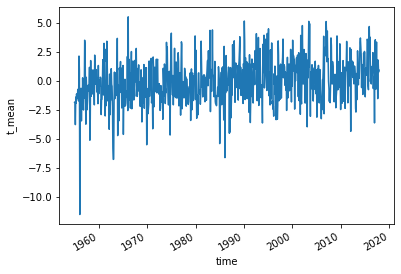

In [5]:
data.plot()

**Compute the linear trend:**

In [6]:
def linear_fit(x, y):
    # y = a + b * x

    sum_dev = 0
    
    for (i,j) in zip(x,y):
        sum_dev += (i-x.mean())*(j-y.mean())
    
    cov_xy = sum_dev/len(x)
        
    b = cov_xy/x.std()**2
    a = y.mean()-b*x.mean()

    return a, b

-0.5025461225571305 9.677105274986445e-19


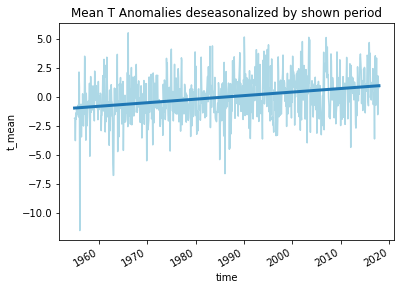

In [7]:
DECADE_IN_NS = 10 * 365.25 * 24 * 3600 * 1e9

# compute slope in K / nanoseconds and offset in K
x = data.time.values.astype("float")  # need float type for fit
y = data.values
a, b = linear_fit(x, y)
print(a,b)

# convert K / ns to K / decade
# k_per_decade = ???

# plot
data.plot(c="lightblue", zorder=0)
plt.plot(
    x.astype("datetime64[ns]"),  # need datetime type for plot
    a + b * x,
    lw=3,
)

plt.title('Mean T Anomalies deseasonalized by shown period')
plt.show()

**Work with NAO:**

In [8]:
def pearson_r (x,y):
    a, b = linear_fit(x,y)
    r = b*x.std()/y.std()
    return r

In [9]:
nao = utils.get_nao()

Pearson correlation coefficent between monthly mean NAO and mean T in Berlin:	
0.2686056425022877
r xr:
0.2686056425022879

Pearson correlation coefficent between monthly mean NAO and mean T in Berlin scatter plot:



C:\Users\maxse\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


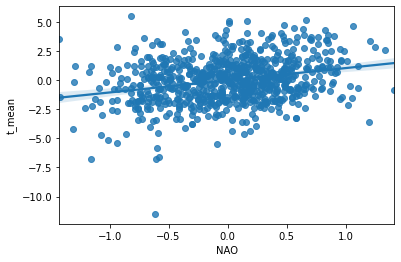

In [10]:
# change time resolution to monthly! (aggregate daily values in one month and compute mean)
nao_monthly = nao.resample(time="MS").mean()  # MS: resample to start of each month

nao_monthly_anom = nao_monthly.groupby('time.month') - nao_monthly.groupby('time.month').mean()

r = pearson_r(nao_monthly_anom.sel(time=slice('1955','2017')), data_1955_2017)
r_xr = xr.corr(nao_monthly_anom.sel(time=slice('1955','2017')), data_1955_2017)

print('Pearson correlation coefficent between monthly mean NAO and mean T in Berlin:\t')
print(r.values)
print('r xr:')
print(r_xr.values)
print('\nPearson correlation coefficent between monthly mean NAO and mean T in Berlin scatter plot:\n')

sb.regplot(nao_monthly_anom.sel(time = slice('1955','2017')), data_1955_2017)

# merging with join=inner ensures that both datasets have same time coordinate
merged = xr.merge([nao_monthly.sel(time=slice('1960','1989')), data_1955_2017])
